# Dataprep - Seasonal Statistics to predict games

In [44]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression, LinearRegression
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt


df = pd.read_csv("/home/swisnoski/nba_predictor_development/models/data/combined_data_2010-2023.csv")
df['TEAM_1_WIN/LOSS'] = df['TEAM_1_WIN/LOSS'].replace({100: 1, 0: 0})
df = df.dropna(subset=['TEAM_1_WIN/LOSS'])
'''
X = df[[
        "TEAM_1_HOME/AWAY",
        "TEAM_1_PTS",
        "TEAM_1_POSS",
        "TEAM_1_PPP",
        "TEAM_1_DEF_PPP",
        "TEAM_1_TS%",
        "TEAM_1_eFG%",
        "TEAM_1_FGA",
        "TEAM_1_FGM",
        "TEAM_1_FG3M",
        "TEAM_1_FTA",
        "TEAM_1_FG_PCT",
        "TEAM_1_OREB",
        "TEAM_1_DREB",
        "TEAM_1_AST",
        "TEAM_1_TOV",
        "TEAM_1_WIN_PCT",
        "TEAM_2_HOME/AWAY",
        "TEAM_2_PTS",
        "TEAM_2_POSS",
        "TEAM_2_PPP",
        "TEAM_2_DEF_PPP",
        "TEAM_2_TS%",
        "TEAM_2_eFG%",
        "TEAM_2_FGA",
        "TEAM_2_FGM",
        "TEAM_2_FG3M",
        "TEAM_2_FTA",
        "TEAM_2_FG_PCT",
        "TEAM_2_OREB",
        "TEAM_2_DREB",
        "TEAM_2_AST",
        "TEAM_2_TOV",
        "TEAM_2_WIN_PCT",
    ]]  
'''
X = df[['TEAM_1_PTS', 'TEAM_1_DEF_PPP', 'TEAM_1_eFG%', 'TEAM_1_FG3M',
       'TEAM_1_FG_PCT', 'TEAM_1_WIN_PCT', 'TEAM_2_HOME/AWAY', 'TEAM_2_POSS',
       'TEAM_2_DEF_PPP', 'TEAM_2_WIN_PCT']]
y = df['TEAM_1_WIN/LOSS']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression

accuracy is 0.6860744297719088
mae is 0.31392557022809126
recall is 0.6860744297719088
precision is 0.6861153019866318
r2 is -0.2559416539010253
Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.69      0.68      1643
         1.0       0.69      0.69      0.69      1689

    accuracy                           0.69      3332
   macro avg       0.69      0.69      0.69      3332
weighted avg       0.69      0.69      0.69      3332



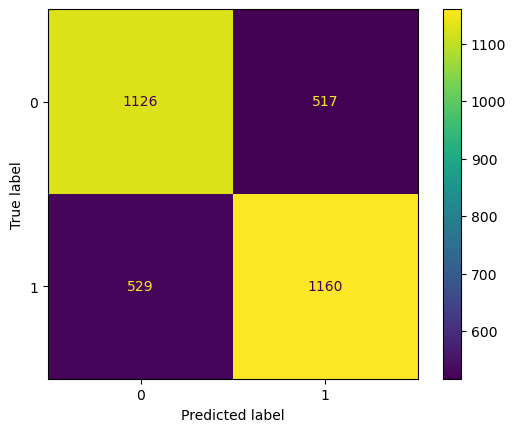

In [45]:
model = LogisticRegression(max_iter=20000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('accuracy is ' + str(metrics.accuracy_score(y_test, y_pred)))
print('mae is ' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('recall is ' + str(metrics.recall_score(y_test, y_pred, average='weighted')))
print('precision is ' + str(metrics.precision_score(y_test, y_pred, average='weighted')))
print('r2 is ' + str(metrics.r2_score(y_test, y_pred)))


report = metrics.classification_report(y_test, y_pred, zero_division=1)
print("Classification Report:")
print(report)

#confusion matrix
confusionmatrix = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix)
disp.plot()
plt.show()

# Linear Regression

In [ ]:
model_LR = LinearRegression()

# Train the model
model_LR.fit(X_train, y_train)

# Make predictions
y_pred_LR = model_LR.predict(X_test)

# Since Linear Regression gives continuous output, we need to round the predictions to get binary outcomes
y_pred_binary = [1 if pred >= 0.5 else 0 for pred in y_pred_LR]

# Evaluate the model
print('Accuracy is ' + str(metrics.accuracy_score(y_test, y_pred_binary)))
print('MAE is ' + str(metrics.mean_absolute_error(y_test, y_pred_binary)))
print('Recall is ' + str(metrics.recall_score(y_test, y_pred_binary, average='weighted')))
print('Precision is ' + str(metrics.precision_score(y_test, y_pred_binary, average='weighted')))
print('R2 is ' + str(metrics.r2_score(y_test, y_pred_binary)))

# Classification report
report_LR = metrics.classification_report(y_test, y_pred_binary, zero_division=1)
print("Classification Report:")
print(report_LR)

# Confusion matrix
confusionmatrix_LR = metrics.confusion_matrix(y_test, y_pred_binary)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix_LR)
disp.plot()
plt.show()

# Random Forest

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_es

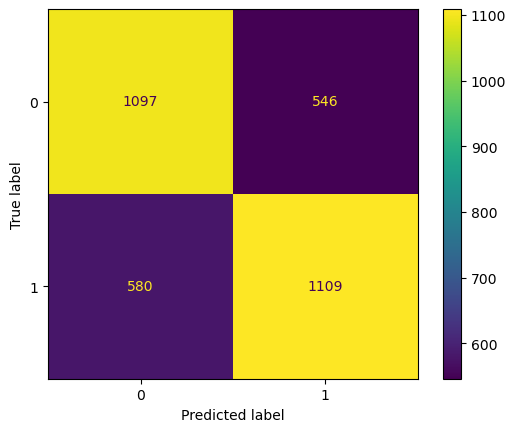

In [38]:
# Initialize the Random Forest model

model_RF = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


grid_search = GridSearchCV(estimator=model_RF, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

# Use the best estimator to make predictions
best_RF = grid_search.best_estimator_
y_pred_RF = best_RF.predict(X_test)

# Train the model
model_RF.fit(X_train, y_train)

# Make predictions

# Evaluate the model
print('Accuracy is ' + str(metrics.accuracy_score(y_test, y_pred_RF)))
print('MAE is ' + str(metrics.mean_absolute_error(y_test, y_pred_RF)))
print('Recall is ' + str(metrics.recall_score(y_test, y_pred_RF, average='weighted')))
print('Precision is ' + str(metrics.precision_score(y_test, y_pred_RF, average='weighted')))
print('R2 is ' + str(metrics.r2_score(y_test, y_pred_RF)))

# Classification report
report_RF = metrics.classification_report(y_test, y_pred_RF, zero_division=1)
print("Classification Report:")
print(report_RF)

# Confusion matrix
confusionmatrix_RF = metrics.confusion_matrix(y_test, y_pred_RF)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusionmatrix_RF)
disp.plot()
plt.show()

# Which Features correlate most to the data? 

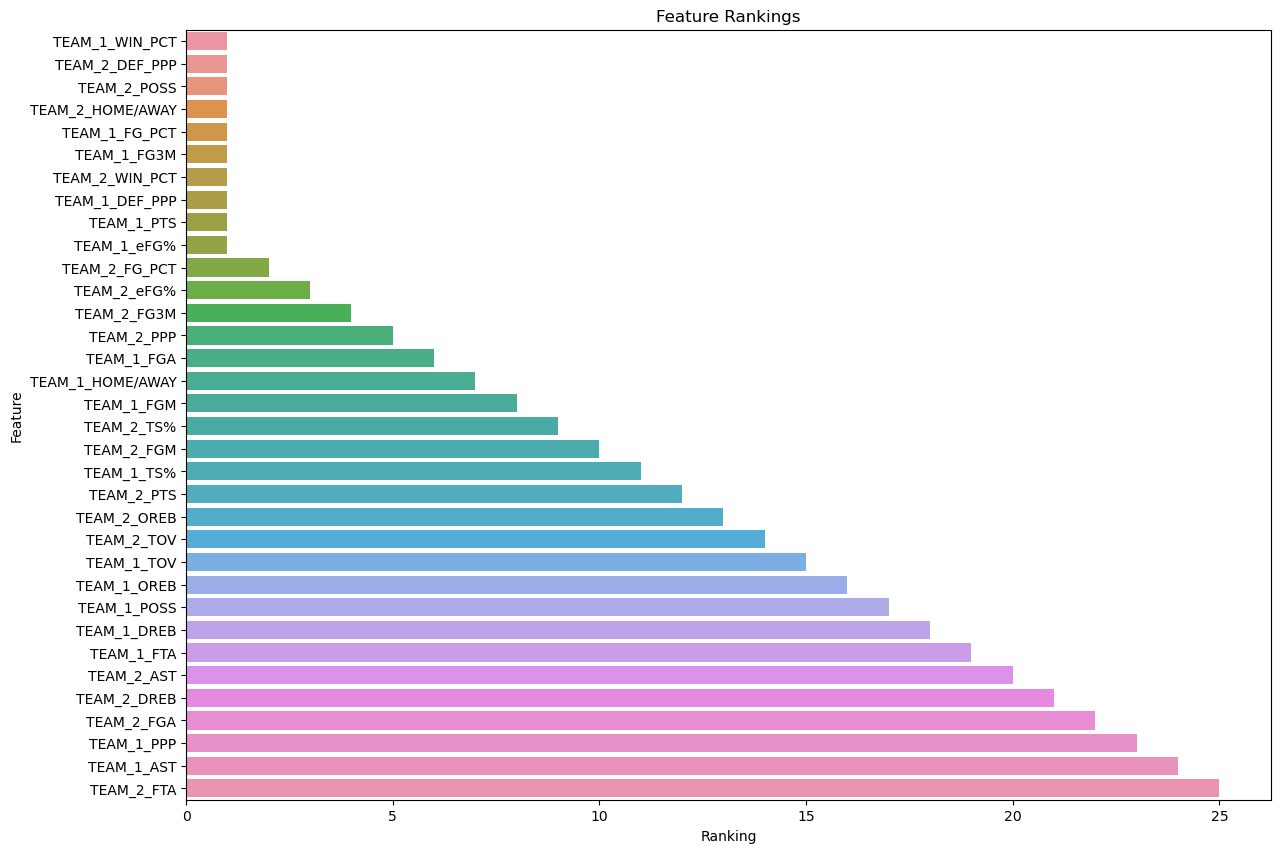

Selected Features:
Index(['TEAM_1_PTS', 'TEAM_1_DEF_PPP', 'TEAM_1_eFG%', 'TEAM_1_FG3M',
       'TEAM_1_FG_PCT', 'TEAM_1_WIN_PCT', 'TEAM_2_HOME/AWAY', 'TEAM_2_POSS',
       'TEAM_2_DEF_PPP', 'TEAM_2_WIN_PCT'],
      dtype='object')


In [40]:
model_LOG = LogisticRegression(max_iter=20000)

# Initialize RFE with the model and number of features to select
rfe = RFE(model_LOG, n_features_to_select=10)
fit = rfe.fit(X, y)

# Get the ranking of features
ranking = fit.ranking_
features = X.columns

# Create a DataFrame for visualization
ranking_df = pd.DataFrame({'Feature': features, 'Ranking': ranking})
ranking_df = ranking_df.sort_values(by='Ranking')

# Plot the feature rankings
plt.figure(figsize=(14, 10))
sns.barplot(x='Ranking', y='Feature', data=ranking_df)
plt.title('Feature Rankings')
plt.show()

print("Selected Features:")
print(features[fit.support_])